In [234]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import requests
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)


The data was obtained from Torontopolice of Ontario, Canada website [link1](https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-1/explore?location=43.171926%2C-76.506260%2C7.73)
[link2](https://data.torontopolice.on.ca/datasets/TorontoPS::neighbourhood-crime-rates-2/explore?location=43.678562%2C-79.378187%2C7.73)

In [278]:
crime_rate = pd.read_csv('Neighbourhood_Crime_Rates.csv') # cleaned up data in Excel
crime_indicators = pd.read_csv('Major_Crime_Indicators.csv') #cleaned up in Excel sheet

The same data can be obtained via their API

In [6]:
crime_indicators_B = crime_indicators.drop(labels = ['X', 'Y', 'Index_', 'ucr_code', 'ucr_ext', 'ObjectId'], axis = 1)

In [7]:
crime_indicators['mci_category'].unique()

array(['Assault', 'Break and Enter', 'Theft Over', 'Robbery',
       'Auto Theft'], dtype=object)

In [8]:
crime_indicators['offence'].unique()

array(['Assault', 'B&E', 'Theft Over', 'Robbery - Business',
       'Theft From Motor Vehicle Over', "B&E W'Intent",
       'Assault - Force/Thrt/Impede', 'Assault Peace Officer',
       'Assault With Weapon', 'Robbery - Financial Institute',
       'Theft Of Motor Vehicle', 'Assault - Resist/ Prevent Seiz',
       'Robbery - Other', 'Pointing A Firearm', 'Robbery - Armoured Car',
       'Robbery - Mugging', 'Robbery With Weapon', 'Aggravated Assault',
       'Assault Bodily Harm', 'Unlawfully In Dwelling-House',
       'Robbery - Swarming', 'Discharge Firearm With Intent',
       'Robbery - Vehicle Jacking', 'Robbery - Purse Snatch',
       'Crim Negligence Bodily Harm', 'Administering Noxious Thing',
       'Discharge Firearm - Recklessly', 'Theft From Mail / Bag / Key',
       'Assault Peace Officer Wpn/Cbh', 'Robbery - Home Invasion',
       'Robbery - Taxi', 'Unlawfully Causing Bodily Harm', 'B&E Out',
       'Theft Over - Shoplifting', 'Use Firearm / Immit Commit Off',
       'Ro

In [9]:
crime_indicators_B.head()

,event_unique_id,Division,occurrencedate,reporteddate,location_type,premises_type,offence,reportedyear,reportedmonth,reportedday,...,occurrencemonth,occurrenceday,occurrencedayofyear,occurrencedayofweek,occurrencehour,mci_category,Hood_ID,Neighbourhood,Longitude,Latitude
0,GO-20141273318,D31,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Apartment (Rooming House, Condo)",Apartment,Assault,2014,January,3,...,January,3.0,3.0,Friday,11,Assault,27,York University Heights,-79.504475,43.766371
1,GO-20141274349,D42,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Single Home, House (Attach Garage, Cottage, Mo...",House,B&E,2014,January,3,...,January,3.0,3.0,Friday,14,Break and Enter,132,Malvern,-79.217083,43.814861
2,GO-20141274052,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,"Open Areas (Lakes, Parks, Rivers)",Outside,Assault,2014,January,3,...,January,3.0,3.0,Friday,13,Assault,19,Long Branch,-79.534957,43.589085
3,GO-20141276966,D53,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Other Commercial / Corporate Places (For Profi...,Commercial,Theft Over,2014,January,3,...,January,3.0,3.0,Friday,12,Theft Over,55,Thorncliffe Park,-79.346588,43.703212
4,GO-20141274457,D22,2014/01/03 05:00:00+00,2014/01/03 05:00:00+00,Convenience Stores,Commercial,Robbery - Business,2014,January,3,...,January,3.0,3.0,Friday,14,Robbery,14,Islington-City Centre West,-79.531916,43.645247


# Exploratory Data Analysis

In [10]:
crime_indicators_B.describe().T

,count,mean,std,min,25%,50%,75%,max
reportedyear,301233.0,2017.876713,2.436940,2014.000000,2016.000000,2018.000000,2020.000000,2022.000000
reportedday,301233.0,15.736659,8.766766,1.000000,8.000000,16.000000,23.000000,31.000000
reporteddayofyear,301233.0,180.765756,103.717225,1.000000,92.000000,178.000000,270.000000,366.000000
reportedhour,301233.0,12.808786,6.502562,0.000000,8.000000,13.000000,18.000000,23.000000
occurrenceyear,301133.0,2017.822852,2.475716,2000.000000,2016.000000,2018.000000,2020.000000,2022.000000
occurrenceday,301133.0,15.456476,8.914754,1.000000,8.000000,15.000000,23.000000,31.000000
occurrencedayofyear,301133.0,180.544766,104.141362,1.000000,92.000000,178.000000,270.000000,366.000000
occurrencehour,301233.0,12.601591,7.243753,0.000000,7.000000,14.000000,19.000000,23.000000
Longitude,301233.0,-78.374071,8.953280,-80.042866,-79.471086,-79.393238,-79.320056,0.000000
Latitude,301233.0,43.143874,4.928613,0.000000,43.659806,43.699132,43.750978,44.333691


In [187]:
cat_columns = ['location_type', 'premises_type', 'offence', 'occurrencemonth', 'occurrencedayofweek','mci_category', 'Neighbourhood']

for i in cat_columns:
    #print("Unique values in", i, "are :")
    #print(crime_indicators_B[i].value_counts())
    #print("-" * 100)
    print("##",i,":")
    print(crime_indicators_B[i].value_counts(normalize=True).mul(100).round(2))
    print("*" * 100)


## location_type :
Apartment (Rooming House, Condo)                                          23.92
Single Home, House (Attach Garage, Cottage, Mobile)                       17.95
Streets, Roads, Highways (Bicycle Path, Private Road)                     15.81
Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg    11.54
Parking Lots (Apt., Commercial Or Non-Commercial)                          8.41
Bar / Restaurant                                                           3.99
Open Areas (Lakes, Parks, Rivers)                                          2.08
Schools During Supervised Activity                                         1.52
Convenience Stores                                                         1.28
Ttc Subway Station                                                         1.21
Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)          1.15
Private Property Structure (Pool, Shed, Detached Garage)                   0.91
Hospital / Institutio

In [189]:
# Countplot with counts
def countplotwithcounts(df,var):
    """ This function provides a countplot with counts and percentages for discrete numeric variables."""
    plt.figure(figsize=(20,10))
    #print(df[var].value_counts())
    #print("-"*223)
    print(df[var].value_counts(normalize = True).mul(100).round(1).astype('str') + "%")
    sns.countplot(data = df,x = var,order = df[var].value_counts().index,color='b')

Assault            53.7%
Break and Enter    19.7%
Auto Theft         13.5%
Robbery             9.7%
Theft Over          3.3%
Name: mci_category, dtype: object


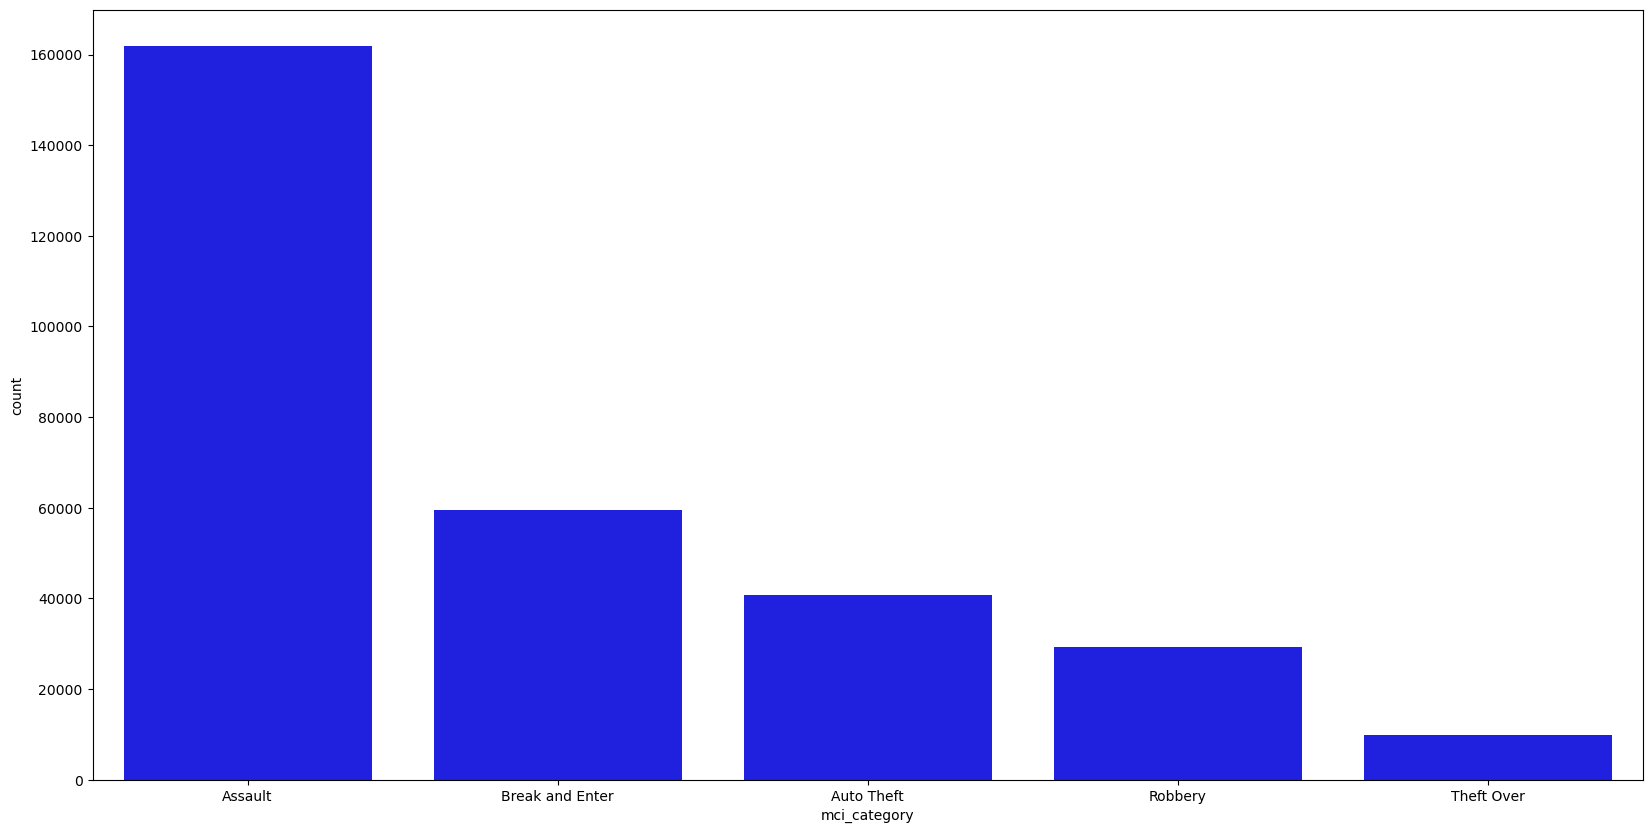

In [190]:
countplotwithcounts(crime_indicators_B,"mci_category")

June         9.1%
May          9.1%
January      8.5%
March        8.5%
October      8.4%
July         8.4%
April        8.3%
August       8.3%
September    8.1%
November     8.0%
December     7.7%
February     7.6%
Name: occurrencemonth, dtype: object


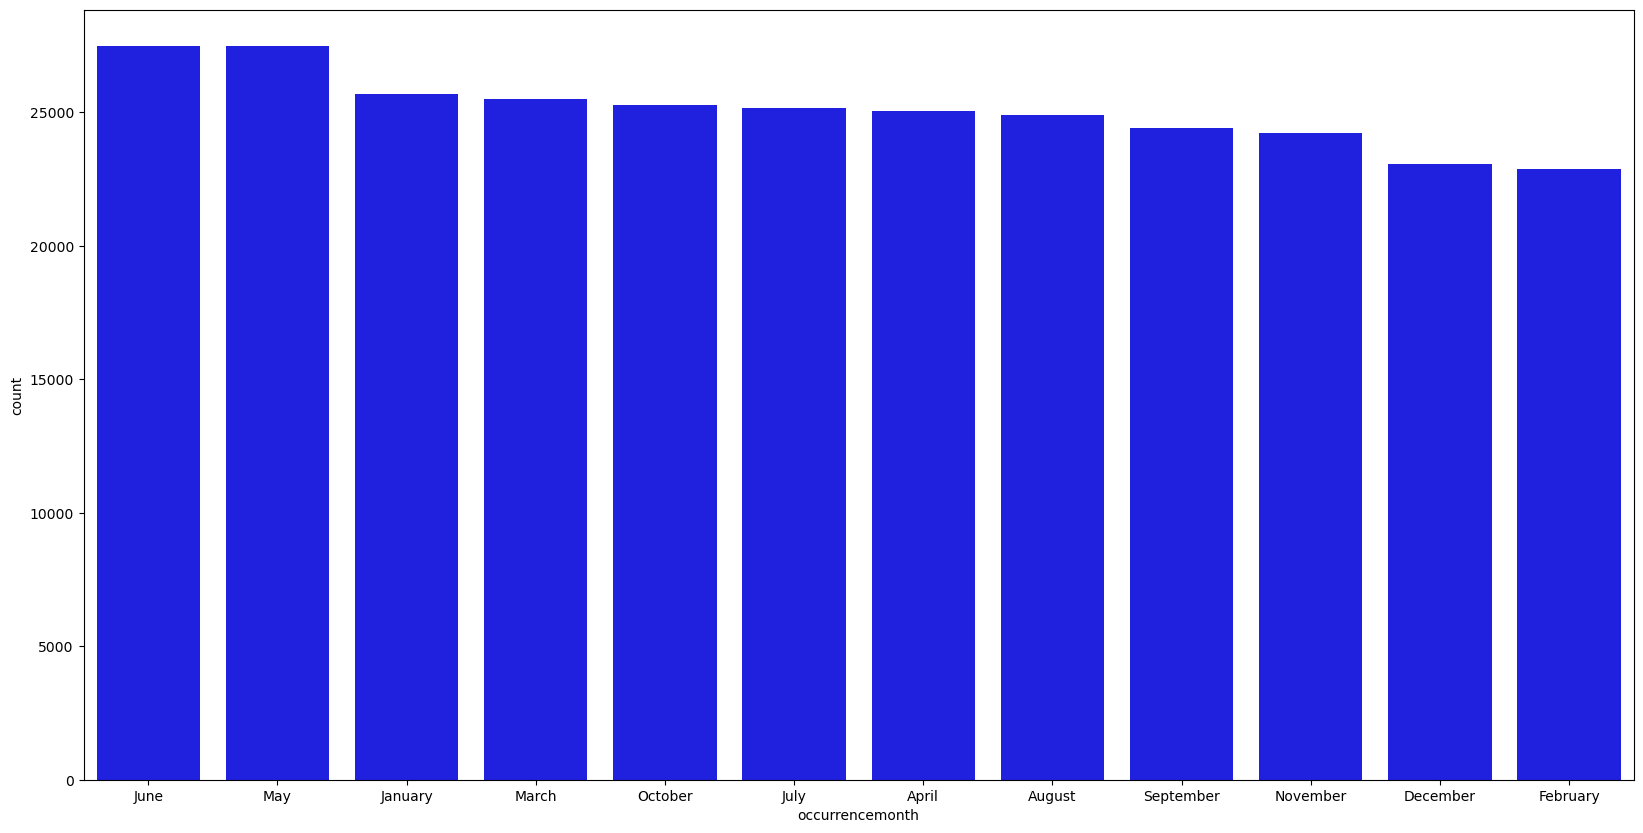

In [191]:
countplotwithcounts(crime_indicators_B,"occurrencemonth")

It is interesting to observe that the highest occurance moth is May and June, maybe assaults happen more in Summer, since everyone goes out in Summer.
<br> 
<br>

0     6.8%
12    5.5%
21    5.4%
18    5.4%
20    5.4%
22    5.3%
19    5.2%
23    5.2%
17    5.1%
15    4.9%
16    4.7%
14    4.2%
1     4.1%
2     4.0%
13    3.9%
11    3.6%
10    3.4%
9     3.3%
3     3.3%
8     2.9%
4     2.5%
7     2.1%
5     2.0%
6     1.8%
Name: occurrencehour, dtype: object


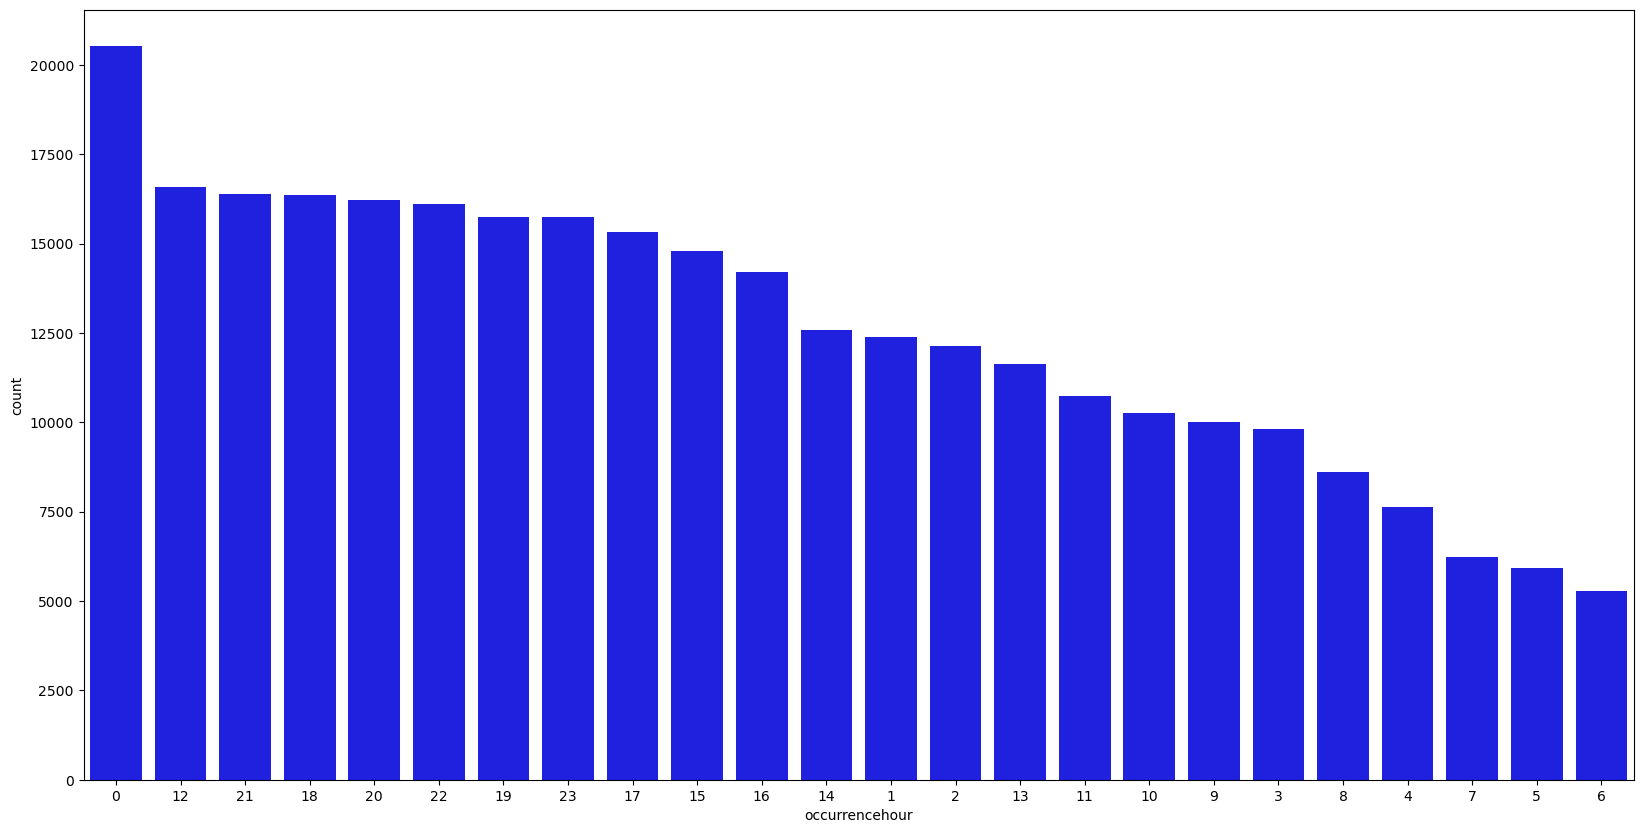

In [192]:
countplotwithcounts(crime_indicators_B, "occurrencehour")

The worst hour is around midnight, next worst timings are around noon, followed by around 9pm.
<br> 
<br>

Friday        15.1%
Saturday      14.8%
Sunday        14.3%
Wednesday     14.1%
Thursday      14.1%
Monday        13.9%
Tuesday       13.7%
Name: occurrencedayofweek, dtype: object


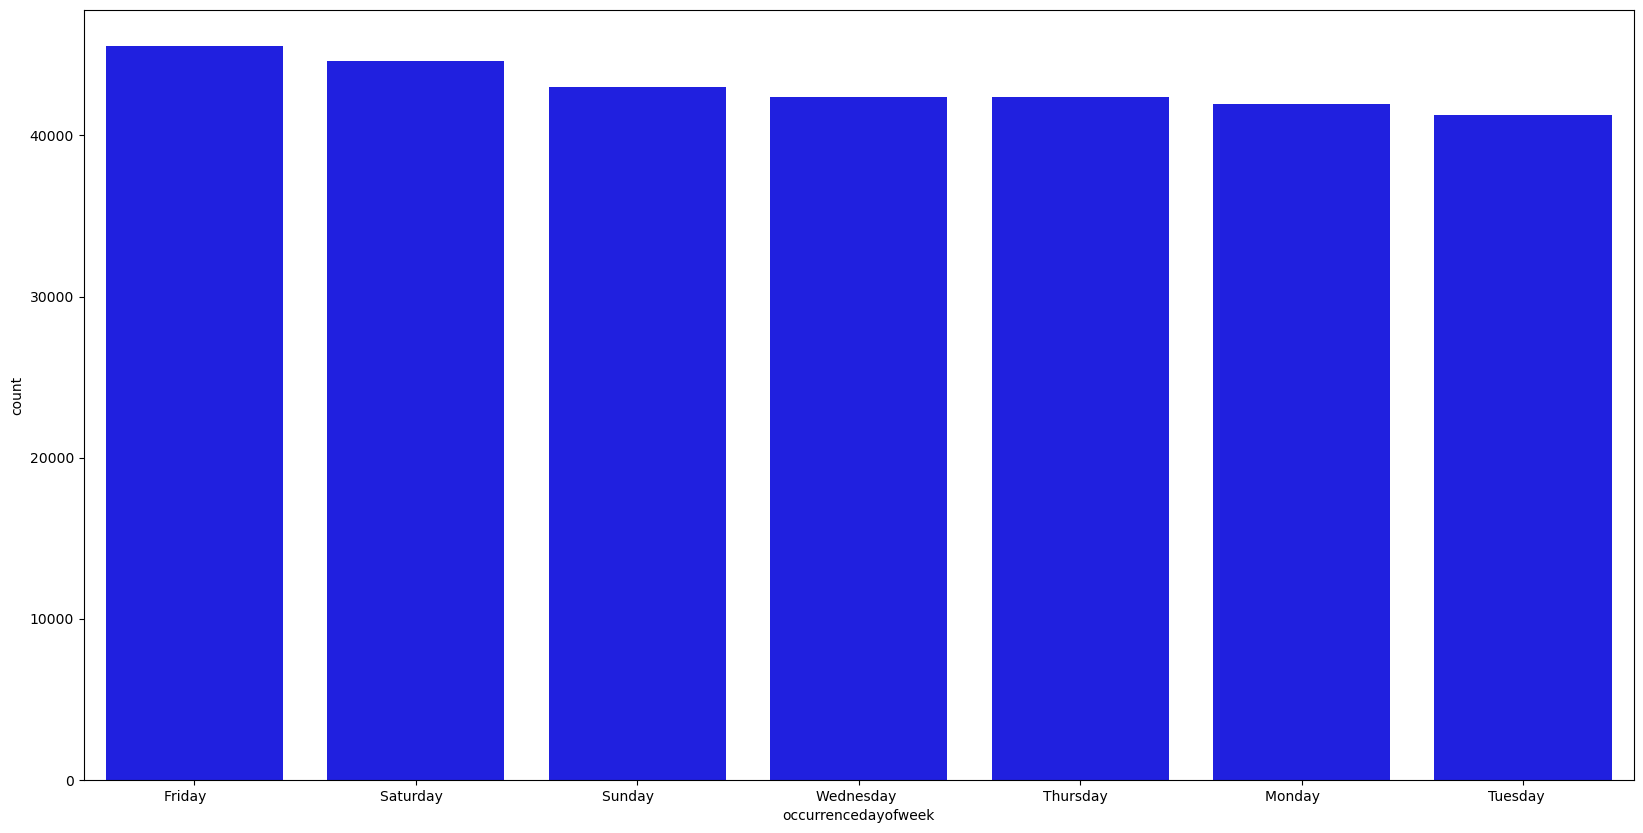

In [196]:
countplotwithcounts(crime_indicators_B, "occurrencedayofweek")

They happen more frequently on Fridays, maybe at the friday parties, huh!
<br> 
<br>

<AxesSubplot:ylabel='Neighbourhood'>

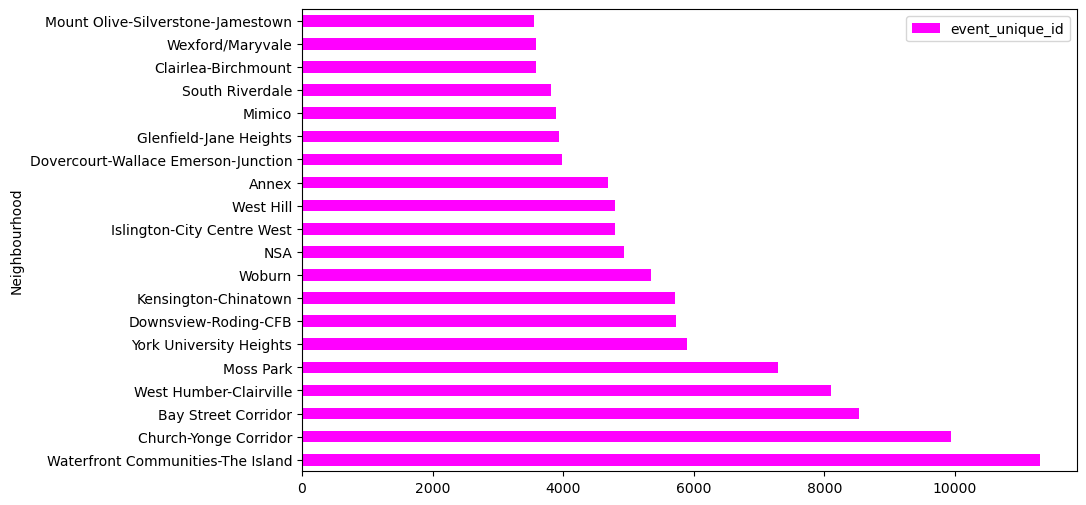

In [23]:
df_hood_grp = crime_indicators_B.groupby('Neighbourhood').count().sort_values(by="event_unique_id", ascending=False).head(20)
df_hood_grp.plot(kind='barh', y='event_unique_id', figsize=(10,6), color='magenta')

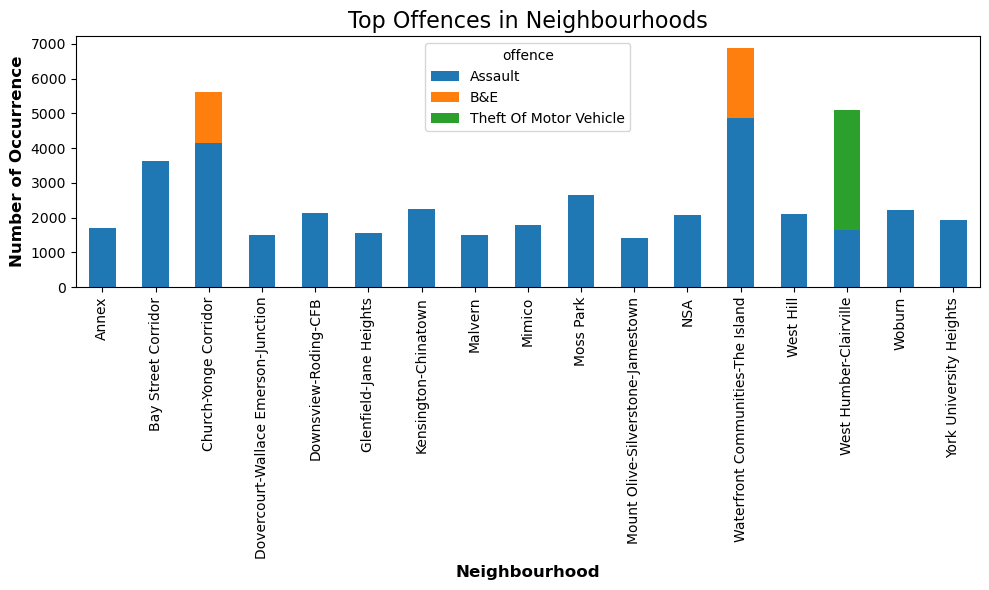

In [24]:
offence_type_by_location = crime_indicators_B.groupby(['Neighbourhood', 'offence']).count().sort_values(by="event_unique_id", ascending=False).head(20)
#offence_type_by_location.plot(kind='barh', y='event_unique_id', figsize=(10,6), color='magenta')
offence_type_by_location = offence_type_by_location.reset_index()
offence_type_by_location.pivot(index='Neighbourhood', columns='offence', values='event_unique_id').plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Neighbourhood', fontsize=12, fontweight='bold')
plt.ylabel('Number of Occurrence', fontsize=12, fontweight='bold')
plt.title('Top Offences in Neighbourhoods', fontsize=16)
plt.tight_layout()

Text(0, 0.5, 'Number of Occurrence')

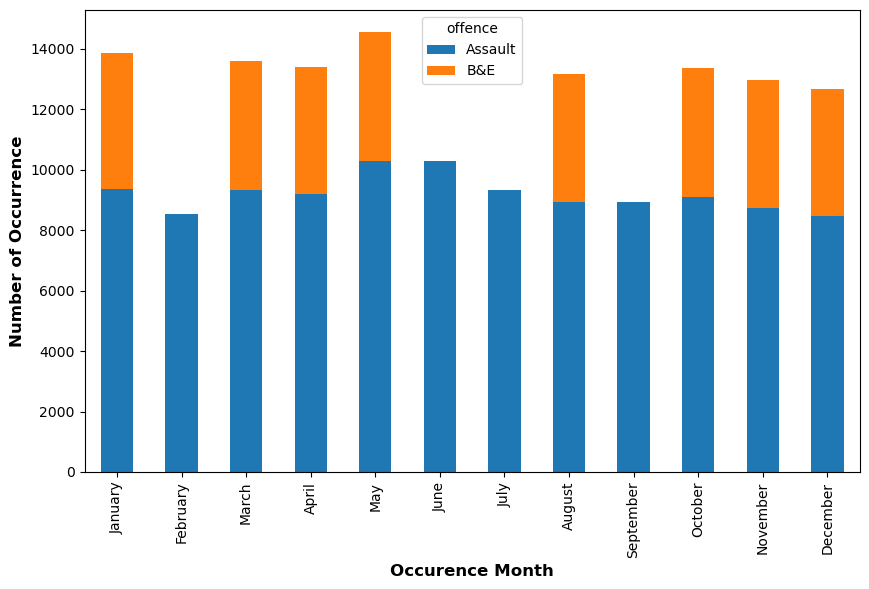

In [25]:
#offence_type_by_location = crime_indicators_B.groupby(['Neighbourhood', 'offence']).count().sort_values(by="event_unique_id", ascending=False).head(20)
crime_indicators_B['occurrencemonth'] = pd.Categorical(crime_indicators_B['occurrencemonth'], 
                                                  categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
                                                  ordered=True)
offence_by_month = crime_indicators_B.groupby(['occurrencemonth', 'offence']).count().sort_values(by="event_unique_id", ascending=False).head(20)
offence_by_month = offence_by_month.reset_index()
#sns.heatmap(offence_by_month.pivot(index='occurrencemonth', columns='offence', values='event_unique_id'), cmap='viridis', annot=True)
offence_by_month.pivot(index='occurrencemonth', columns='offence', values='event_unique_id').plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Occurence Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Occurrence', fontsize=12, fontweight='bold')

# Predicting the category of Crime with Gradient boost classifier

In [213]:
X = crime_indicators_B.drop(labels = ['mci_category', 'reporteddate' , 'offence', 'location_type', 'event_unique_id', 'occurrencedate', 'occurrencedayofyear', 'offence', 'reportedmonth', 'reportedyear', 'reportedday', 'reporteddayofyear', 'reporteddayofweek','reportedhour'], axis = 1)
y = crime_indicators_B['mci_category']

#print(f"X.shape {X.shape} y.shape {y.shape}")

# Convert the target variable to numerical labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#print(f"X.shape {X.shape} y.shape {y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = ['Division', 'premises_type', 'occurrencemonth', 'occurrencedayofweek', 'Hood_ID', 'Neighbourhood']
#ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)], remainder='passthrough')
#if you want sparse=False, you need to use column transformer
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = ohe.fit_transform(X_train)

# Initialize an XGBClassifier with default hyperparameters
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [215]:
X_test_encoded = ohe.transform(X_test)
y_pred = xgb.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.91      0.74     32381
           1       0.58      0.36      0.44      8211
           2       0.60      0.38      0.47     11838
           3       0.67      0.04      0.08      5800
           4       0.62      0.01      0.03      2017

    accuracy                           0.62     60247
   macro avg       0.62      0.34      0.35     60247
weighted avg       0.62      0.62      0.56     60247



In [42]:
crime_indicators_B['mci_category'].value_counts()

Assault            161833
Break and Enter     59440
Auto Theft          40794
Robbery             29230
Theft Over           9936
Name: mci_category, dtype: int64

Our data is highly imbalanced, for the first category (class 0) there are 161833 datapoints and for Robbery there are only 29230. Let's see if we try to balance the data by synthetically creating datapoints which look like the particular class and re-build the model, see if the model performs better.

</b>


# Balancing the dataset

I am using SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous) since my labels are categorical.
</b>

I do not want to discard the datapoints with NaN in them, so I use this column transformer where numerical data is processed in a way that take mean values of the neighbouring data to replaces NaN; and in case of categorical data, frequently observed value is taken to replace NaNs (in this way, we do not lose any data)

In [216]:
X = crime_indicators_B.drop(labels = ['mci_category', 'reporteddate' , 'offence', 'location_type', 'event_unique_id', 'occurrencedate', 'occurrencedayofyear', 'offence', 'reportedmonth', 'reportedyear', 'reportedday', 'reporteddayofyear', 'reporteddayofweek','reportedhour'], axis = 1)
y = crime_indicators_B['mci_category']

numerical_cols = ['occurrenceyear', 'occurrenceday', 'occurrencehour', 'Longitude', 'Latitude']
categorical_cols = ['Division', 'premises_type', 'occurrencemonth', 'occurrencedayofweek', 'Hood_ID', 'Neighbourhood']

preprocessor = ColumnTransformer(
               [('num', SimpleImputer(strategy='mean'), numerical_cols),
                ('imputer', SimpleImputer(strategy='most_frequent'), categorical_cols)
               ])

X_prep = preprocessor.fit_transform(X) # mainly to deal with NaNs

#because I can't give X_prep directly to smotenc, since its an array and I need column index to be the same, noting that the column order is different here
X_prep_df = pd.DataFrame(X_prep, columns =  ['occurrenceyear', 'occurrenceday', 'occurrencehour', 'Longitude', 'Latitude', 'Division', 'premises_type', 'occurrencemonth', 'occurrencedayofweek', 'Hood_ID', 'Neighbourhood'])

print(X_prep_df.shape)
print(y.shape)

smotenc = SMOTENC(categorical_features = [5, 6, 7, 8, 9, 10])
X_resampled, y_resampled = smotenc.fit_resample(X_prep_df, y)

(301233, 11)
(301233,)


In [146]:
y.value_counts()

Assault            161833
Break and Enter     59440
Auto Theft          40794
Robbery             29230
Theft Over           9936
Name: mci_category, dtype: int64

In [147]:
y_resampled.value_counts()

Assault            161833
Break and Enter    161833
Theft Over         161833
Robbery            161833
Auto Theft         161833
Name: mci_category, dtype: int64

In [151]:
X_resampled.head(3)

,occurrenceyear,occurrenceday,occurrencehour,Longitude,Latitude,Division,premises_type,occurrencemonth,occurrencedayofweek,Hood_ID,Neighbourhood
0,2014.0,3.0,11.0,-79.504475,43.766371,D31,Apartment,January,Friday,27,York University Heights
1,2014.0,3.0,14.0,-79.217083,43.814861,D42,House,January,Friday,132,Malvern
2,2014.0,3.0,13.0,-79.534957,43.589085,D22,Outside,January,Friday,19,Long Branch


In [199]:
y_resampled = label_encoder.fit_transform(y_resampled)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_res_encoded, test_size=0.2, random_state=42)

cat_cols = ['Division', 'premises_type', 'occurrencemonth', 'occurrencedayofweek', 'Hood_ID', 'Neighbourhood']

ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)], remainder='passthrough')

X_train_encoded = ct.fit_transform(X_train)

# Initialize an XGBClassifier with default hyperparameters
xgb_resam = XGBClassifier()

xgb_resam.fit(X_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [152]:
X_test_encoded = ct.transform(X_test)
y_pred = xgb_resam.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.58      0.64     32207
           1       0.72      0.47      0.57     32337
           2       0.71      0.45      0.55     32453
           3       0.74      0.37      0.49     32386
           4       0.77      0.40      0.52     32450

   micro avg       0.73      0.45      0.56    161833
   macro avg       0.73      0.45      0.55    161833
weighted avg       0.73      0.45      0.55    161833
 samples avg       0.44      0.45      0.45    161833



C:\Users\Varun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
